<a href="https://colab.research.google.com/github/falsefoobar/CS381/blob/main/R_Leung__Quiz_Assign_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

##Why do people get loans?
If you have an idea for a business and you do not have the capital to create your business, getting a loan might be a great way to get enough capital to start your own venture. The same goes for getting a house,   most people do not have enough capital to outright purchase a home. Therefore, the purpose of getting a loan is to borrow enough money to make an investment or purchase that would otherwise be financially out of reach. This makes it possible for people to achieve their dreams.

##What is a loan?
A loan is a legal binding contract between two entities, a lender and a borrower. A loan is a sum of money given to a lender in exchange for a repayment of that money. The repayment consists of the loan principal amount with interest on top. How long do you have to repay your loan? That depends on the contractual agreement with the lender. A time frame of the repayment are usually planned ahead of time.

##How can I get a loan?
A lender, whether it be a bank or friend, might consider the borrower's income, credit score, and debt, before giving out a loan. As a lender, you'll want to know whether or not the borrower is able to honor their end of the contract, which means whether or not the borrower is going to be able to repay their loan and interest. Every loan program might differ in their eligibility requirements and application process. A bank might consider the borrower's credit score, credit history, current debts, current income, or employment when determining if the borrower is eligible.


*What Is a Loan*, from investopedia. https://www.investopedia.com/terms/l/loan.asp

#What is redlining?
According to NYC Environment and Health, redlining is the drawing boundaries around neighborhoods based on residents’ race and depriving them of resources and opportunities - effectively racializing poverty in cities across the U.S. As a result, people of color were denied the ability to purchase homes in more desirable locations. It created a mapping of neighborhoods where people of color were concentrated in certain neighborhoods. This effectively created neighborhood segregation and inequality to the familes in the segregated neighborhood.

*A brief history of redlining*, from NYC Environment and Health Data. https://a816-dohbesp.nyc.gov/IndicatorPublic/data-stories/redlining/

#Objective:
1. Does being a person of color increase the chance of mortgage application denial?
2. Does income or credit score have an effect on redlining?
3. Does being a person of color increase the chance of mortgage application denial?
4. From this data, can we identify the main metrics used for redlining?


#Attributes

1. dir: debt payments to total income ratio

2. hir: housing expenses to income ratio

3. lvr: ratio of size of loan to assessed value of property

4. ccs: consumer credit score from 1 to 6 (a low value being a good score)

5. mcs: mortgage credit score from 1 to 4 (a low value being a good score)

6. pbcr: public bad credit record ?

7. dmi: denied mortgage insurance ?

8. self: self employed ?

9. single: is the applicant single ?

10. uria: 1989 Massachusetts unemployment rate in the applicant's industry

11. condominium: is unit a condominium ? (was called comdominiom in version 0.2-9 and earlier versions of the package)

12. black: is the applicant black ?

13. deny: mortgage application denied ?

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://github.com/falsefoobar/CS381/blob/main/HDMA%20Boston%20Housing%20Data.csv?raw=True")
df.head()

,",dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny"
0,"1,0.221000004,0.221000004,0.8,5,2,no,no,no,no,..."
1,"2,0.265,0.265,0.921875,2,2,no,no,no,yes,3.2000..."
2,"3,0.372000008,0.247999992,0.92039801,1,2,no,no..."
3,"4,0.32,0.25,0.860465116,1,2,no,no,no,no,4.3000..."
4,"5,0.36,0.35,0.6,1,1,no,no,no,no,3.200000048,0,..."


The data set needs to be cleaned. It has all the attributes and data in one column.

In [263]:
column_names = df.columns[0].split(',')  # split string into list

# Split the single column by comma (creates Series of lists)
split_rows = df.iloc[:, 0].str.split(',')

# Take the data rows (drop first row)
data_rows = split_rows.iloc[1:].reset_index(drop=True)

# Remove the first item from each data row (drop the index column from data)
trimmed_rows = data_rows.apply(lambda x: x[1:])

# Convert to clean dataFrame
df_clean = pd.DataFrame(trimmed_rows.tolist(), columns=column_names[1:])  # drop first col from header too

print(df_clean.head())
print("Shape:", df_clean.shape)


           dir          hir          lvr ccs mcs pbcr dmi self single  \
0        0.265        0.265     0.921875   2   2   no  no   no    yes   
1  0.372000008  0.247999992   0.92039801   1   2   no  no   no     no   
2         0.32         0.25  0.860465116   1   2   no  no   no     no   
3         0.36         0.35          0.6   1   1   no  no   no     no   
4         0.24         0.17  0.510526316   1   1   no  no   no     no   

          uria comdominiom black deny  
0  3.200000048           0    no   no  
1  3.200000048           0    no   no  
2  4.300000191           0    no   no  
3  3.200000048           0    no   no  
4  3.900000095           0    no   no  
Shape: (2380, 13)


In [268]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2380 non-null   float64
 1   hir          2380 non-null   float64
 2   lvr          2380 non-null   float64
 3   ccs          2380 non-null   int64  
 4   mcs          2380 non-null   int64  
 5   pbcr         2380 non-null   object 
 6   dmi          2380 non-null   int64  
 7   self         2380 non-null   object 
 8   single       2380 non-null   int64  
 9   uria         2380 non-null   float64
 10  comdominiom  2380 non-null   int64  
 11  black        2380 non-null   int64  
 12  deny         2380 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 241.8+ KB


In [285]:
df_clean.isnull().sum()


,0
dir,0
hir,0
lvr,0
ccs,0
mcs,0
pbcr,1
dmi,0
self,1
single,0
uria,0


All the data types are objects, we need to covert the data types.

In [279]:
# Covert to float
cols_to_convert = ['dir', 'hir', 'lvr', 'uria']
df_clean[cols_to_convert] = df_clean[cols_to_convert].astype(float)
# covert to integer
df_clean[['ccs', 'mcs','comdominiom']] = df_clean[['ccs', 'mcs','comdominiom']].astype(float)
df_clean[['ccs', 'mcs','comdominiom']] = df_clean[['ccs', 'mcs','comdominiom']].astype(int)
# Convert yes or no answer to 1 or 0
binary_cols = ['pbcr', 'dmi', 'self', 'single', 'black', 'deny']

# Replace 'yes' with 1, 'no' with 0
df_clean[binary_cols] = df_clean[binary_cols].replace({'yes': 1, 'no': 0})

df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2380 non-null   float64
 1   hir          2380 non-null   float64
 2   lvr          2380 non-null   float64
 3   ccs          2380 non-null   int64  
 4   mcs          2380 non-null   int64  
 5   pbcr         2379 non-null   float64
 6   dmi          2380 non-null   int64  
 7   self         2379 non-null   float64
 8   single       2380 non-null   int64  
 9   uria         2380 non-null   float64
 10  comdominiom  2380 non-null   int64  
 11  black        2380 non-null   int64  
 12  deny         2380 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 241.8 KB


,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.265,0.265,0.921875,2,2,0.0,0,0.0,1,3.2,0,0,0
1,0.372,0.248,0.920398,1,2,0.0,0,0.0,0,3.2,0,0,0
2,0.320,0.250,0.860465,1,2,0.0,0,0.0,0,4.3,0,0,0
3,0.360,0.350,0.600000,1,1,0.0,0,0.0,0,3.2,0,0,0
4,0.240,0.170,0.510526,1,1,0.0,0,0.0,0,3.9,0,0,0


In [278]:
df_clean.isnull().sum()


,0
dir,0
hir,0
lvr,0
ccs,0
mcs,0
pbcr,1
dmi,0
self,1
single,0
uria,0


In [305]:
df_clean['pbcr'] = df_clean['pbcr'].fillna(0).astype(int)
df_clean['self'] = df_clean['self'].fillna(0).astype(int)
df_clean.isnull().sum()

,0
dir,0
hir,0
lvr,0
ccs,0
mcs,0
pbcr,0
dmi,0
self,0
single,0
uria,0


I filled the null data points with the median which is 'no' or 0

In [292]:
df_clean.describe()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
count,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2379.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000
mean,0.330860,0.255361,0.737734,2.115126,1.720588,0.073529,0.020168,0.116435,0.393697,3.774443,0.288235,0.142437,0.119748
std,0.107234,0.096653,0.178748,1.665673,0.537454,0.261058,0.140604,0.320814,0.488672,2.027060,0.453036,0.349571,0.324735
min,0.000000,0.000000,0.020000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000
25%,0.280000,0.214000,0.652681,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.100000,0.000000,0.000000,0.000000
50%,0.330000,0.260000,0.779289,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000
75%,0.370000,0.298825,0.868459,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.900000,1.000000,0.000000,0.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.600000,1.000000,1.000000,1.000000


In [275]:
df_clean[df_clean['black'] == 1].describe()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.0,339.000000
mean,0.350989,0.266266,0.808848,3.020649,1.879056,0.176991,0.050147,0.073746,0.516224,3.445133,0.492625,1.0,0.283186
std,0.089345,0.076339,0.158224,2.008013,0.421470,0.382225,0.218572,0.261744,0.500475,1.498914,0.500685,0.0,0.451212
min,0.056000,0.000000,0.187500,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,1.0,0.000000
25%,0.310000,0.230000,0.755476,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.000000,1.0,0.000000
50%,0.350000,0.270000,0.826772,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.200000,0.000000,1.0,0.000000
75%,0.390000,0.310000,0.900000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.900000,1.000000,1.0,1.000000
max,0.830000,0.660000,1.950000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.600000,1.000000,1.0,1.000000


The first thing that pops out to me is that there are only 14% of black applicant in this data set. That is a significantly skewed ratio. It will be nice to know why a lower count of the applicants are black.


The average consumer credit score and mortage score from black applicants is higher by 1. The higher the score the better.

Umemployment rate in the black participant's industry is a lower by a 0.3%. This should inidicate less risk for the lender.  

lvr is higher for black participants, meaning they are applying for a higher loan amount to the value of the property.

And a .02 percentage of black participants have their mortgage insurance denied.

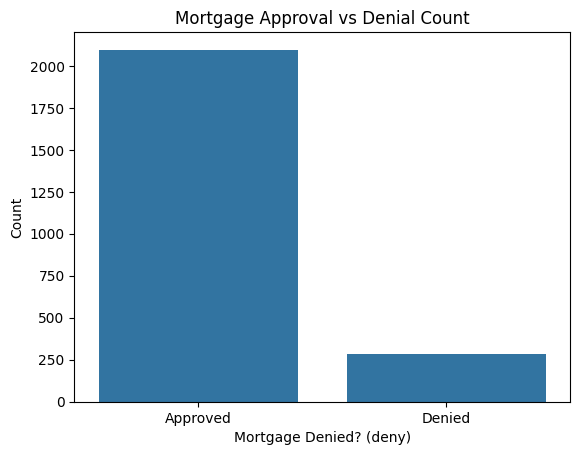

In [ ]:
sns.countplot(data=df_clean, x='deny')
plt.title('Mortgage Approval vs Denial Count')
plt.xlabel('Mortgage Denied? (deny)')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Approved', 'Denied'])
plt.show()

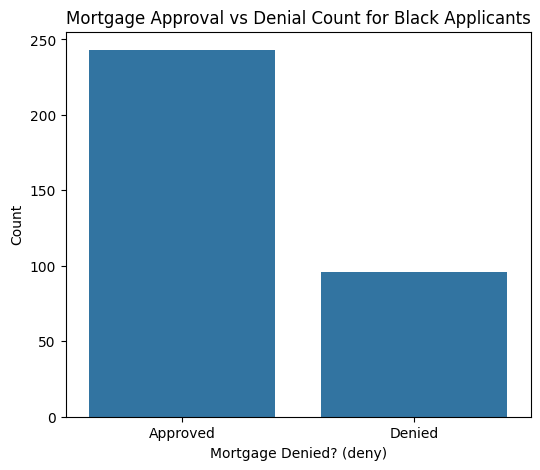

In [ ]:
black_df = df_clean[df_clean['black'] == 1]

plt.figure(figsize=(6,5))
sns.countplot(data=black_df, x='deny')
plt.title('Mortgage Approval vs Denial Count for Black Applicants')
plt.xlabel('Mortgage Denied? (deny)')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Approved', 'Denied'])
plt.show()

Mortgage insurance helps people get loans by making it less risky for the lender. The main point is to protect the lender, not the borrower. If the borrower can’t pay and the house is sold in foreclosure, the insurance helps the lender get the full amount of the loan back. The borrower usually buys the insurance, but it’s for the lender’s benefit. The borrower pays for it through higher monthly payments or sometimes at closing.

*What is mortgage insurance and how does it work?*, from Consumer Financial Protection Bureau. https://www.consumerfinance.gov/ask-cfpb/what-is-mortgage-insurance-and-how-does-it-work-en-1953/

Let's see the if there is a correlation between mortage insurance denial and mortage applicantion denial.

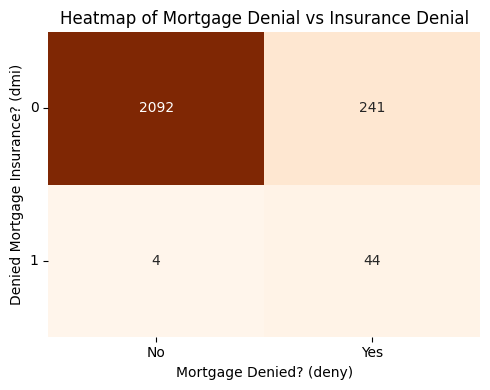

In [ ]:
heat_data = pd.crosstab(df_clean['dmi'], df_clean['deny'])

plt.figure(figsize=(5, 4))
sns.heatmap(heat_data, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Heatmap of Mortgage Denial vs Insurance Denial')
plt.xlabel('Mortgage Denied? (deny)')
plt.ylabel('Denied Mortgage Insurance? (dmi)')
plt.yticks(rotation=0)
plt.xticks(ticks=[0.5, 1.5], labels=['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

Most participants do not have their mortage insurance denied, and mortage denied. Most people are getting approved.

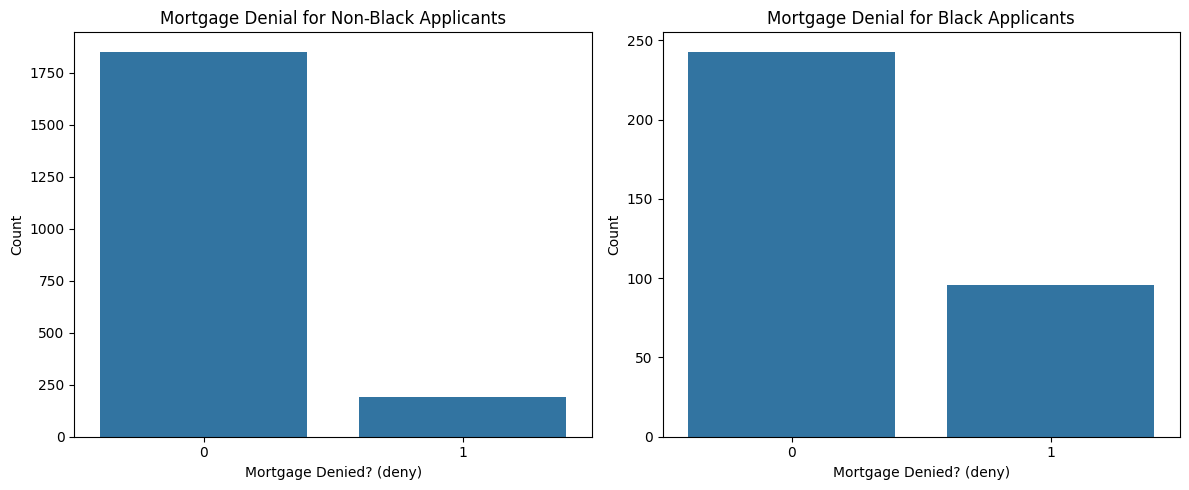

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df_clean[df_clean['black'] == 0], x='deny')
plt.title('Mortgage Denial for Non-Black Applicants')
plt.xlabel('Mortgage Denied? (deny)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df_clean[df_clean['black'] == 1], x='deny')
plt.title('Mortgage Denial for Black Applicants')
plt.xlabel('Mortgage Denied? (deny)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
deny_black_1 = df_clean[(df_clean['black'] == 1) & (df_clean['deny'] == 1)].shape[0]
deny_black_0 = df_clean[(df_clean['black'] == 0) & (df_clean['deny'] == 1)].shape[0]

total_black = df_clean[df_clean['black'] == 1].shape[0]
total_non_black = df_clean[df_clean['black'] == 0].shape[0]

deny_rate_black = (deny_black_1 / total_black) * 100 if total_black > 0 else 0
deny_rate_non_black = (deny_black_0 / total_non_black) * 100 if total_non_black > 0 else 0

print(f"Total Black Applicants: {total_black}")
print(f"Mortgage Denial for Black Applicants: {deny_black_1} ({deny_rate_black:.2f}%)\n")

print(f"Total Non-Black Applicants: {total_non_black}")
print(f"Mortgage Denial for Non-Black Applicants: {deny_black_0} ({deny_rate_non_black:.2f}%)")

Total Black Applicants: 339
Mortgage Denial for Black Applicants: 96 (28.32%)

Total Non-Black Applicants: 2042
Mortgage Denial for Non-Black Applicants: 189 (9.26%)


There is a 28.32% denial rate for black participants and 9.26% denial rate for non black participants.

In [ ]:
# Total number of Black applicants
total_black = df_clean[df_clean['black'] == 1].shape[0]

# Total number of Non-Black applicants
total_non_black = df_clean[df_clean['black'] == 0].shape[0]

# Mortgage insurance denied counts (already defined)
dmi_black_1 = df_clean[(df_clean['black'] == 1) & (df_clean['dmi'] == 1)].shape[0]
dmi_black_0 = df_clean[(df_clean['black'] == 0) & (df_clean['dmi'] == 1)].shape[0]

# Calculate percentages
percent_dmi_black_1 = (dmi_black_1 / total_black) * 100
percent_dmi_black_0 = (dmi_black_0 / total_non_black) * 100

print(f"Mortgage Insurance Denied for Black Applicants: {dmi_black_1} ({percent_dmi_black_1:.2f}%)")
print(f"Mortgage Insurance Denied for Non-Black Applicants: {dmi_black_0} ({percent_dmi_black_0:.2f}%)")


Mortgage Insurance Denied for Black Applicants: 17 (5.01%)
Mortgage Insurance Denied for Non-Black Applicants: 31 (1.52%)


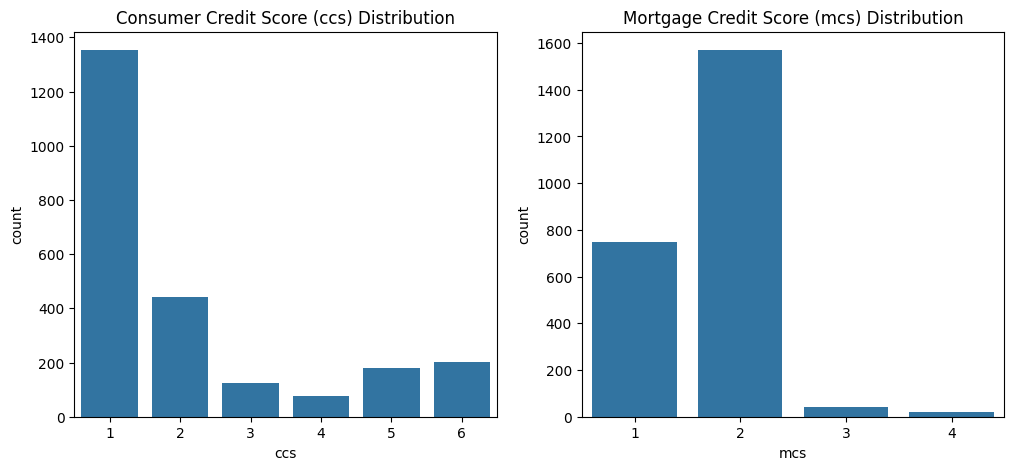

In [295]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=df_clean, x='ccs')
plt.title('Consumer Credit Score (ccs) Distribution')

plt.subplot(1,2,2)
sns.countplot(data=df_clean, x='mcs')
plt.title('Mortgage Credit Score (mcs) Distribution')

plt.show()

Most of the credit scores in the data point skew to the low range of the credit score. Which is unusual because I would think that more people would be denied a mortage if thier credit score is low. Perhaps there is not much weight to credit scores in the application?

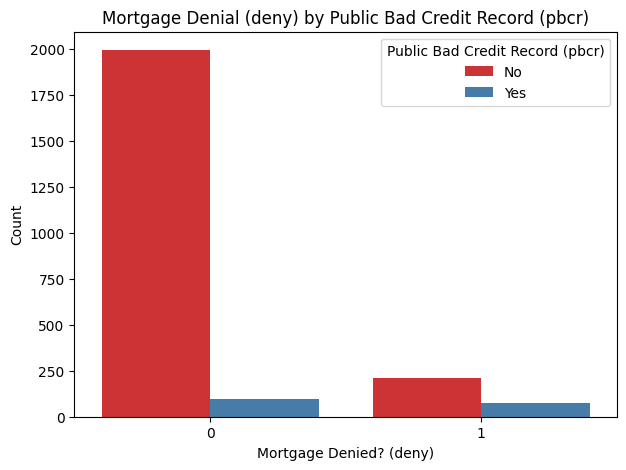

In [301]:

plt.figure(figsize=(7,5))
sns.countplot(data=df_clean, x='deny', hue='pbcr', palette='Set1')
plt.title('Mortgage Denial (deny) by Public Bad Credit Record (pbcr)')
plt.xlabel('Mortgage Denied? (deny)')
plt.ylabel('Count')
plt.legend(title='Public Bad Credit Record (pbcr)', labels=['No', 'Yes'])
plt.show()

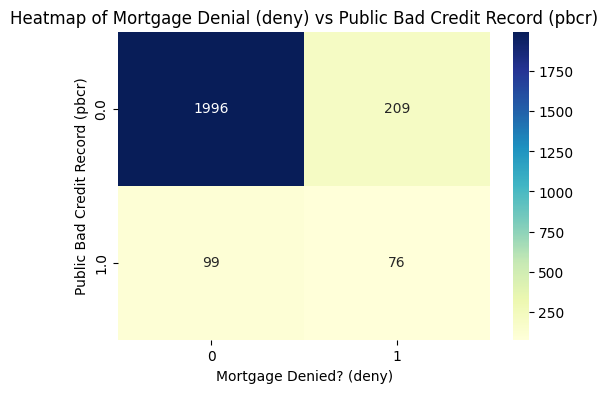

In [302]:
contingency_table = pd.crosstab(df_clean['pbcr'], df_clean['deny'])

plt.figure(figsize=(6,4))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Mortgage Denial (deny) vs Public Bad Credit Record (pbcr)')
plt.xlabel('Mortgage Denied? (deny)')
plt.ylabel('Public Bad Credit Record (pbcr)')
plt.show()

Public bad credit record has 209 participants with a 'no' bad record,

With this data, we want to be able to predict if someone's mortgage is denied or accepted. I want to use 'deny' as the the target variable and test the other categorical data using logistic regression.

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Select features and target
features = ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'pbcr', 'dmi', 'self', 'single', 'uria', 'comdominiom', 'black']
X = df_clean[features]
y = df_clean['deny'].astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.99      0.95       420
           1       0.74      0.30      0.43        56

    accuracy                           0.91       476
   macro avg       0.83      0.64      0.69       476
weighted avg       0.89      0.91      0.89       476

[[414   6]
 [ 39  17]]


Almost all the 0's were correctly predicted. But predicting 1's was much less accurate. The data set too heavy in the approvals of loans.

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Filter data where black == 1
df_black = df_clean[df_clean['black'] == 1]

# Select features and target (exclude 'black' since it's constant 1 here)
features = ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'pbcr', 'dmi', 'self', 'single', 'uria', 'comdominiom']
X = df_black[features]
y = df_black['deny'].astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.80      0.82        54
           1       0.35      0.43      0.39        14

    accuracy                           0.72        68
   macro avg       0.60      0.61      0.60        68
weighted avg       0.74      0.72      0.73        68

[[43 11]
 [ 8  6]]


When testing with black participates, the model's accuracy worsened. The smaller sample size might be the cause for this inaccuracy.

#Conclusion
Based on the analysis of this dataset, I do not find strong evidence to suggest that redlining is a significant issue here. The proportion of data points representing black applicants is small compared to the overall dataset. It limits the ability to draw strong conclusions about redlining practices.



#References

https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html

https://www.investopedia.com/terms/l/loan.asp